In [1]:
from idf_analysis.idf_class import IntensityDurationFrequencyAnalyse
from idf_analysis.definitions import *
import pandas as pd
%matplotlib inline

# Intensity Duration Frequency Analyse

## Parameter

**series_kind**:

`PARTIAL` = Partielle Serie (partial duration series, PDS) (peak over threshold, POT)

`ANNUAL` = Jährliche Serie (annual maximum series, AMS)

**worksheet**:

`DWA`:
- DWA-A 531
- KOSTRA - empfohlen
- Stützstellen: 60min und 12h

`DWA-adv`:
- DWA-A 531
- Unterscheidung in überwiegend konvektiv und advektiv verursachte Starkregen
- Stützstellen: 3h und 24h

`ATV`:
- ATV-A 121
- Stützstellen: 3h und 48h

**output_path** = Pfad zum Speichern

**extended_durations** = Inkludiert die Dauerstufen `[720, 1080, 1440, 2880, 4320, 5760, 7200, 8640]` in der Analyse



In [2]:
out = 'example'
name = 'EXAMPLE'
idf = IntensityDurationFrequencyAnalyse(series_kind=PARTIAL, worksheet=DWA, output_path=out,
                                            extended_durations=True, output_filename=name,
                                            auto_save=True, unix=True)

Es wird nun ein Ordner `<name>_data` erstellt in `<out>`

In [3]:
data = pd.read_parquet('example/expample_rain_data.parquet')

In [4]:
data.head()

,precipitation
datetime,
1984-06-18 07:01:00,0.0
1984-06-18 07:02:00,0.0
1984-06-18 07:03:00,0.0
1984-06-18 07:04:00,0.0
1984-06-18 07:05:00,0.0


In [5]:
data.tail()

,precipitation
datetime,
2015-12-31 23:56:00,0.0
2015-12-31 23:57:00,0.0
2015-12-31 23:58:00,0.0
2015-12-31 23:59:00,0.0
2016-01-01 00:00:00,NaN


In [6]:
idf.set_series(data['precipitation'])

Bei jeder neuen Berechnung werden Zwischenergebnisse erstellt, welche nur abhängig von der gewählten Serie `series_kind`sind. Dieser Vorgang dauert einige Sekunden.

Abgerufen können diese Zwischenergebnisse mit:

(Dies Operation geschieht im Hintergrund und muss nicht explizit durchgeführt werden.)

In [7]:
idf.interim_results

,u,w
duration,,
5,4.892919,1.898484
10,7.755988,3.462260
15,9.507452,4.478862
20,10.810765,5.007685
30,12.564117,5.356536
45,14.835755,5.571916
60,17.040537,6.284027
90,19.245340,7.741161
180,22.858734,8.314070


Ist `auto_save=True` werden die Zwischenergebnisse je Serie (abhängig von `output_path` und `output_filename`) in die csv-Datei `<name>_interim_results.csv` geschrieben.
Dies wird empfohlen da jeder neue Aufruf etwas Zeit beansprucht und dadurch die Bereichnung verkürzt wird.

In [8]:
! tree example/EXAMPLE_data

example/EXAMPLE_data
└── EXAMPLE_interim_results.csv

0 directories, 1 file


In [9]:
pd.read_csv(idf.output_filename + '_interim_results.csv', index_col=0)

,u,w
duration,,
5,4.892919,1.898484
10,7.755988,3.462260
15,9.507452,4.478862
20,10.810765,5.007685
30,12.564117,5.356536
45,14.835755,5.571916
60,17.040537,6.284027
90,19.245340,7.741161
180,22.858734,8.314070


Aus diesen Zwischenergebnissen werden in weiterer Folge die Parameter zur Berechnung der Regenhöhe und Regenspende ermittelt.

Hier sind bereist die Berechnungsverfahren und Stückpunkte laut dem gewählten `worksheet` berücksichtigt.

(Dies Operation geschieht ebenfalls im Hintergrund und muss nicht explizit durchgeführt werden.)

In [10]:
idf.parameter

,von,bis,u,w,a_u,b_u,a_w,b_w
0,0,60,hyperbolic,double_logarithmic,22.062868,19.345155,0.157064,0.435379
1,60,720,double_logarithmic,double_logarithmic,1.690632,0.274476,1.524280,0.101451
2,720,inf,linear,linear,NaN,NaN,NaN,NaN


## Berechnungen

In [11]:
from IPython.display import Latex
def print_latex(string):
    Latex('$' + string.replace(' ', '\;')+ '$')

In [12]:
idf.depth_of_rainfall(duration=15, return_period=1)

9.635799248801103

In [13]:
idf.print_depth_of_rainfall(duration=15, return_period=1)

Resultierende Regenhöhe h_N(T_n=1.0a, D=15.0min) = 9.64 mm


In [14]:
idf.rain_flow_rate(duration=15, return_period=1)

107.06443609779004

In [15]:
idf.print_rain_flow_rate(duration=15, return_period=1)

Resultierende Regenspende r_N(T_n=1.0a, D=15.0min) = 107.06 L/(s*ha)


In [16]:
idf.r_720_1()

7.638689565603002

In [17]:
idf.get_return_period(height_of_rainfall=10, duration=15)

1.1004705938364563

In [18]:
idf.get_duration(height_of_rainfall=10, return_period=1)

16.037428575529145

In [19]:
idf.result_table()

,0.5,1.0,2.0,3.0,5.0,10.0,15.0,50.0,100.0
5,2.896881,4.531265,6.165648,7.121702,8.326186,9.960570,10.916623,13.755492,15.389875
10,5.308281,7.518402,9.728523,11.021361,12.650144,14.860265,16.153103,19.992007,22.202128
15,6.998968,9.635799,12.272631,13.815078,15.758333,18.395164,19.937612,24.517698,27.154529
20,8.226366,11.215037,14.203707,15.951967,18.154515,21.143185,22.891446,28.082663,31.071334
30,9.847698,13.413395,16.979091,19.064890,21.692686,25.258383,27.344181,33.537674,37.103371
45,11.175611,15.429741,19.683871,22.172377,25.307524,29.561654,32.050161,39.439438,43.693568
60,11.861947,16.683716,21.505485,24.326039,27.879517,32.701286,35.521840,43.897087,48.718856
90,13.623472,18.647718,23.671965,26.610961,30.313659,35.337905,38.276901,47.003845,52.028092
180,17.165170,22.555442,27.945714,31.098821,35.071266,40.461537,43.614644,52.977361,58.367633
270,19.594039,25.210661,30.827284,34.112798,38.252055,43.868678,47.154192,56.910072,62.526695


In [31]:
idf.result_table(add_names=True)

return period (a),0.5,1.0,2.0,3.0,5.0,10.0,15.0,50.0,100.0
frequency (1/a),2.000,1.000,0.500,0.333,0.200,0.100,0.067,0.020,0.010
duration (min),,,,,,,,,
5,2.896881,4.531265,6.165648,7.121702,8.326186,9.960570,10.916623,13.755492,15.389875
10,5.308281,7.518402,9.728523,11.021361,12.650144,14.860265,16.153103,19.992007,22.202128
15,6.998968,9.635799,12.272631,13.815078,15.758333,18.395164,19.937612,24.517698,27.154529
20,8.226366,11.215037,14.203707,15.951967,18.154515,21.143185,22.891446,28.082663,31.071334
30,9.847698,13.413395,16.979091,19.064890,21.692686,25.258383,27.344181,33.537674,37.103371
45,11.175611,15.429741,19.683871,22.172377,25.307524,29.561654,32.050161,39.439438,43.693568
60,11.861947,16.683716,21.505485,24.326039,27.879517,32.701286,35.521840,43.897087,48.718856
90,13.623472,18.647718,23.671965,26.610961,30.313659,35.337905,38.276901,47.003845,52.028092


To save the table as a csv:

In [20]:
idf.write_table()

      0.5    1.0    2.0    3.0    5.0    10.0   15.0   50.0   100.0
5       2.9    4.5    6.2    7.1    8.3   10.0   10.9   13.8   15.4
10      5.3    7.5    9.7   11.0   12.7   14.9   16.2   20.0   22.2
15      7.0    9.6   12.3   13.8   15.8   18.4   19.9   24.5   27.2
20      8.2   11.2   14.2   16.0   18.2   21.1   22.9   28.1   31.1
30      9.8   13.4   17.0   19.1   21.7   25.3   27.3   33.5   37.1
45     11.2   15.4   19.7   22.2   25.3   29.6   32.1   39.4   43.7
60     11.9   16.7   21.5   24.3   27.9   32.7   35.5   43.9   48.7
90     13.6   18.6   23.7   26.6   30.3   35.3   38.3   47.0   52.0
180    17.2   22.6   27.9   31.1   35.1   40.5   43.6   53.0   58.4
270    19.6   25.2   30.8   34.1   38.3   43.9   47.2   56.9   62.5
360    21.5   27.3   33.1   36.4   40.7   46.5   49.9   59.9   65.7
450    23.1   29.0   34.9   38.4   42.7   48.7   52.1   62.4   68.3
600    25.3   31.4   37.5   41.0   45.5   51.6   55.2   65.8   71.9
720    26.8   33.0   39.2   42.8   47.4   53.6  

In [22]:
! tree example/EXAMPLE_data

example/EXAMPLE_data
├── EXAMPLE_interim_results.csv
└── EXAMPLE_results_h_N.csv

0 directories, 2 files


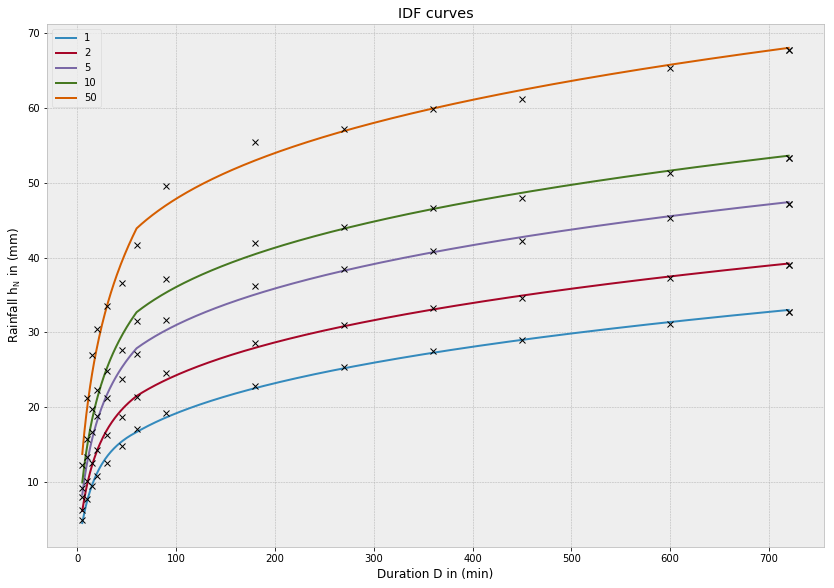

In [30]:
fig = idf.result_figure(color=True)

----------------------------------------------------------------------------------

*Dieser Block funktioniert nur in einen laufenden Jupyter Notebook!*

In [23]:
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

In [24]:
def f(min_duration = 5, max_duration=720, color=True, logx=False):
    fig = idf.result_figure(return_periods=[1,2,5,10,50], 
                            min_duration=min_duration, 
                            max_duration=max_duration, 
                            color=color, 
                            logx=logx)

In [25]:
interact(f, min_duration = (0,60,5), max_duration=(60,8640, 60), color=True, logx=False)

interactive(children=(IntSlider(value=5, description='min_duration', max=60, step=5), IntSlider(value=720, des…

<function __main__.f(min_duration=5, max_duration=720, color=True, logx=False)>

----------------------------------------------------------------------------------

To save the plot as a png use:

In [26]:
idf.result_plot()

'example/EXAMPLE_data/EXAMPLE_idf_plot.png'

In [27]:
! tree example/EXAMPLE_data

example/EXAMPLE_data
├── EXAMPLE_idf_plot.png
├── EXAMPLE_interim_results.csv
└── EXAMPLE_results_h_N.csv

0 directories, 3 files
